# Python Project - Prosper Loan Listing Analysis
## by Zechariah T. Ogungbile

## Introduction

Prosper Loan is a leading marketplace lending company in the United States that has funded over $9 billion in loans, and I will be performing exploratory data analysis (EDA) on their loan listing dataset, which contains information on the loan origination, borrowers characteristics and lenders activities from 2005 to 2015. With this dataset, a proper analysis can be done to understand borrower behaviours and their impact on the trends in the loan market.

## Preliminary Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df=pd.read_csv('Prosper Loan.csv')
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


### What is the structure of your dataset?

The dataset contains 113937 rows and 81 columns. The columns comprises different variables, there are; 3 boolean, 49 floats, 12 integers, and 17 strings, which will be important for our analysis. Although, the variable attributes of these columns are likely to change should the dataset require any further cleaning or adjustment.    

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in this dataset includes: loan amount, borrower APR, loan status, credit grade, and borrower characteristics like employment status, occupation, and credit score range.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Other features that will further aid the analysis are the datetime values in the dataset, this will provide more insights on the activities and behaviours of borrower in a given period. 

In [3]:
#the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Univariate Exploration 

### Quantitative

Question: How does the Borrower's APR affect the borrower behaviour?

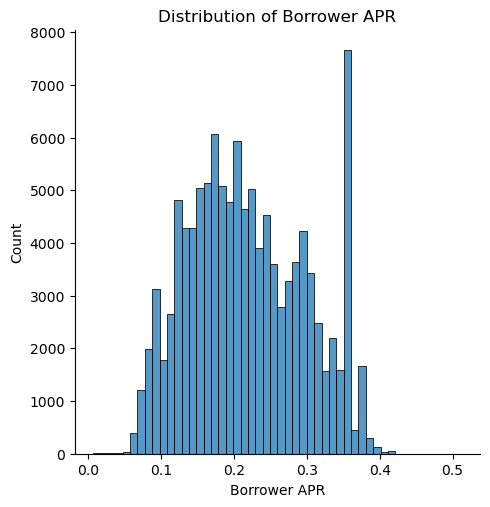

In [4]:
sns.displot(data=df, x="BorrowerAPR", bins=50)
plt.xlabel("Borrower APR")
plt.ylabel("Count")
plt.title("Distribution of Borrower APR");

Observation:  The histogram chart above shows a hike indicated by the tallest bar between 0.3 to 0.4 which portrays the most common borrower APR, likewise, a pyramid-like structure formed between 0.1 to 0.3 suggests that borrowers are less willing to pay higher interest rates. Prosper Loan should consider adjusting its interest rate policy. Setting the interest range around the most common APR range of 0.3 to 0.4 might attract the most borrowers, however, borrowers may be less willing to accept higher interest rates.

### Categorical

Questions: What are the loan status of all borrowers?

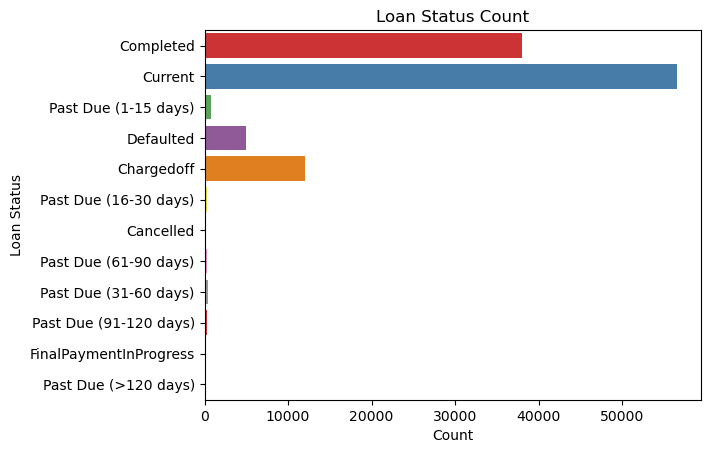

In [12]:
sns.countplot(y='LoanStatus', data=df, palette='Set1')
plt.title("Loan Status Count")
plt.xlabel("Count")
plt.ylabel("Loan Status")
plt.show();

Observation: This horizontal bar chart shows that a significant number of borrowers are currently active with their loans, however, Prosper Loan should be weary of the numbers of defaulted and chargedoff loan status, if added together it is a relatively high number. The Company should reconsider their loan approval policies and loan recovery approaches to be more friendly for borrowers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The data is explanatory enough and well-detailed with various variables to work with. It is convenient to pick the columns that are less problematic to work with and still be able to make relevant analyses.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Some transformations and changes were done in the remainder of the analysis, such as changing the date column to a datetime variable also converting it to show just the year.

## Bivariate Exploration


### Quantitative

Question 1: What are the relationship between the borrower APR and the lender yield? 

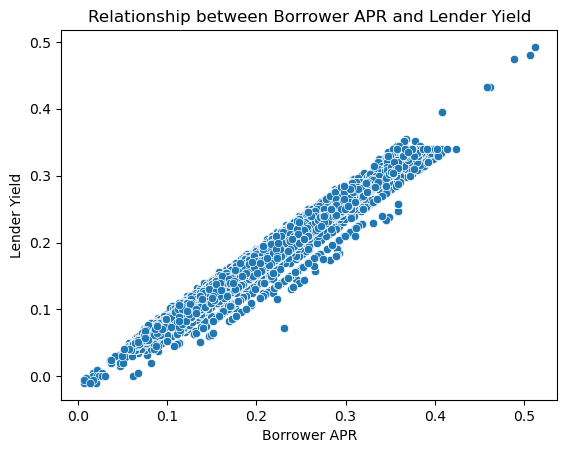

In [13]:
sns.scatterplot(x='BorrowerAPR', y='LenderYield', data=df)
plt.title('Relationship between Borrower APR and Lender Yield')
plt.xlabel('Borrower APR')
plt.ylabel('Lender Yield')
plt.show();

Observation: The scattered plot above depicts a positive relationship between the borrower APR and the lender yield, this is evidence by the anscending stacked dots. It is important to note that at the 0.5 point of the chart fewer dots are visible, this could suggest that fewer borrowers are willing to accept higher APRs. Prosper Loan should investigate the cause of this and likewise consider offering lower APRs to attract more borrowers. 

Question 2:  How has the loss rate by loan status affect the Prosper Loan rating?

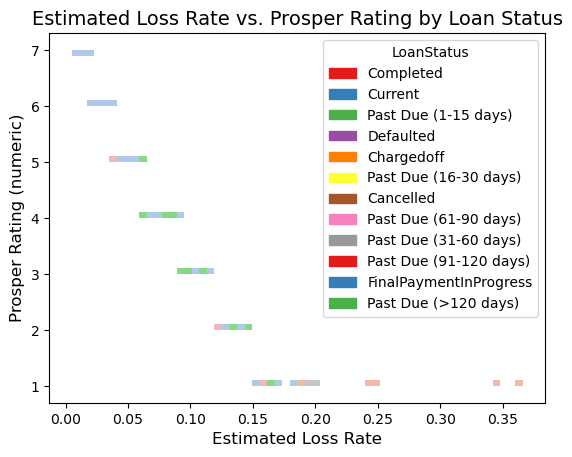

In [14]:
sns.histplot(data=df, x='EstimatedLoss', y='ProsperRating (numeric)', hue='LoanStatus', bins=60, palette='Set1')
plt.title('Estimated Loss Rate vs. Prosper Rating by Loan Status', fontsize=14)
plt.xlabel('Estimated Loss Rate', fontsize=12)
plt.ylabel('Prosper Rating (numeric)', fontsize=12)
plt.show();

Observation: It aopears in this chart that loans with higher estimated loss rates tend to have lower Prosper Loan ratings. This is an indication that the Prosper rating depicts a good loan quality. Borrowers who has a current status has recorded the lowest estimated loss and the highest prosper rating. Prosper ratings between 3 to 6 are also shown to have lesser loss rate. This may suggests that more focus should be placed on borrowers whose status are within this ranges as this will strike a balance between risk and potential return. Prosper loan need to take into account the borrowers attributes, like credit score and employment status. 

### Categorical

Question 1: What are the employment status of borrower and what is the correlation with borrowers loan status? 

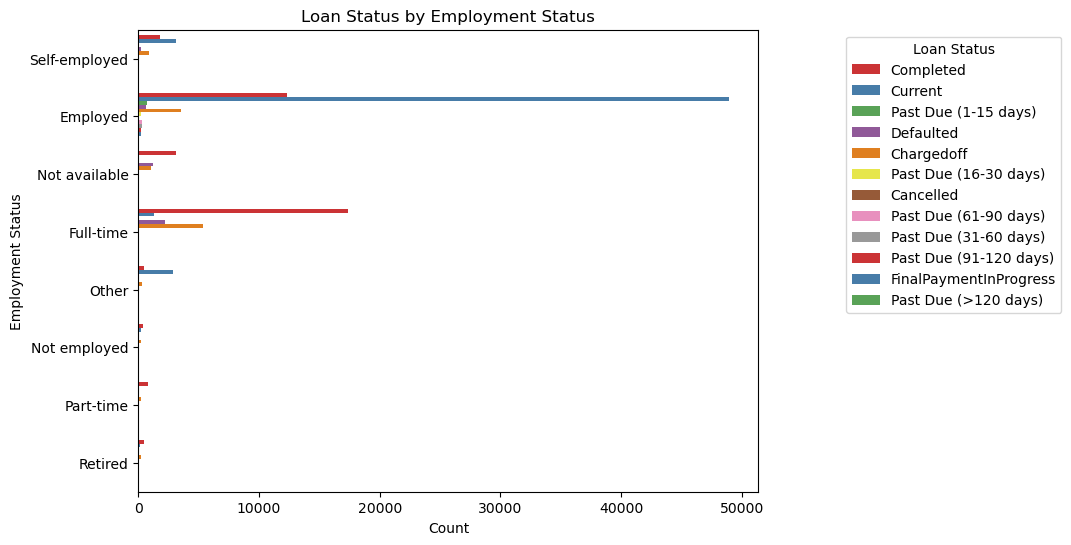

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='EmploymentStatus', hue='LoanStatus', palette='Set1')
plt.title('Loan Status by Employment Status')
plt.xlabel("Count")
plt.ylabel("Employment Status");
plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show();

Observation: The countplot chart shows that employed borrowers have the highest number of current loan status and a good number completed loan status borrowers, while self-employed and other employment status borrowers have relatively low numbers. Notably, full-time employee borrowers have the lowest number of current loan status borrowers and the highest number of completed loan status borrowers. The loan company can consider targeting employed borrowers as they have a higher likelihood of repaying their loans. Additionally, the loan company can investigate why full-time employees have a lower number of current loan status borrowers compared to other employment status borrowers and make necessary adjustments to improve their loan offerings for this category of borrowers.

Question 2: What Loan Status has the highest number of Home owner borrower?

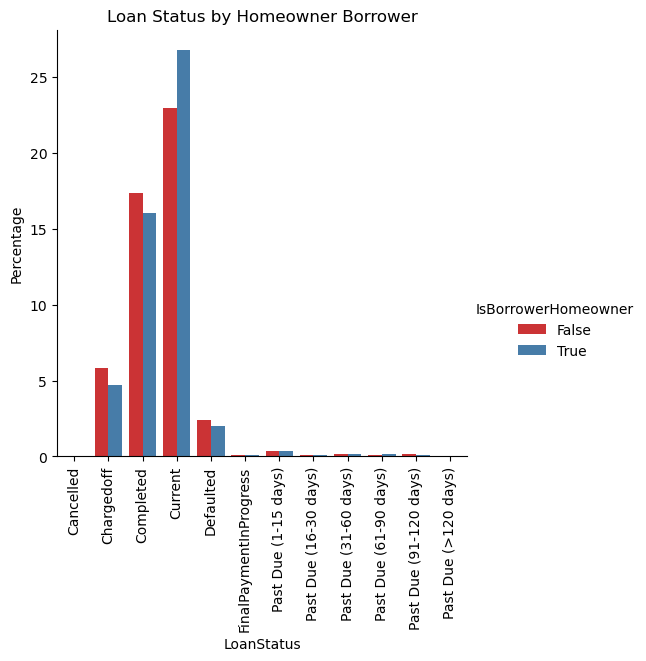

In [16]:
loan_status = df.groupby(['LoanStatus', 'IsBorrowerHomeowner']).size().reset_index(name='count')
loan_status['percentage'] = loan_status['count'] / loan_status['count'].sum() * 100
sns.catplot(x='LoanStatus', y='percentage', hue='IsBorrowerHomeowner', kind='bar', data=loan_status, palette='Set1')
plt.xticks(rotation=90)
plt.title('Loan Status by Homeowner Borrower')
plt.ylabel('Percentage')
plt.show();

Observation: The above bar chart depicts that home ownership is positively correlated with a higher likelihood of having a current loan status and negatively correlated with a higher likelihood of having a chargedoff or defaulted loan status. This suggests that home ownership may be a factor in a borrower's ability to make timely loan payments. However, it is important to note that correlation does not necessarily imply causation and other factors may also be at play. Therefore, it is recommended that the loan company continue to consider various factors, such as credit score and employment status, when assessing the creditworthiness of borrowers.

### Categorical and Quantitative

Question 1: What years record the highest loan origination? 

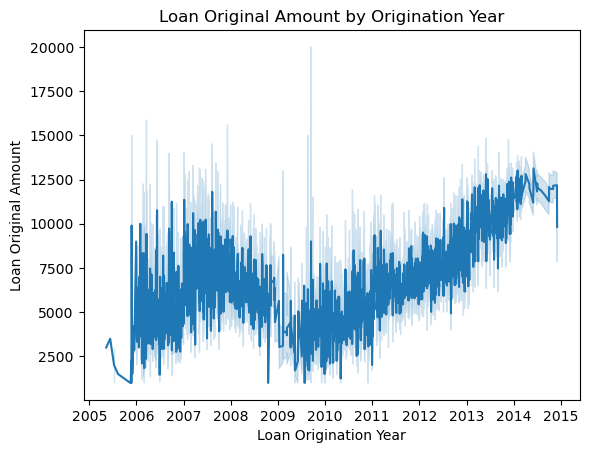

In [17]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
df['OriginationMonth'] = df['LoanOriginationDate'].dt.to_period('M')
line = sns.lineplot(x='LoanOriginationDate', y='LoanOriginalAmount', data=df)
plt.title('Loan Original Amount by Origination Year')
plt.xlabel("Loan Origination Year")
plt.ylabel("Loan Original Amount")
plt.show();

Observation: The line chart shows the trend of loan origination amounts from 2005 to 2015. It indicates that there was a peak in loan origination between 2005 and 2007, with a balance of loan amount between 2500 to 10,000. However, the loan origination dropped to the lowest point in 2009 and gradually increased from 2011 to 2015. The trend suggests that there may have been a change in the lending policy, economic conditions, or borrower behavior during the period. Based on this observation, the loan company may consider evaluating its lending policies and market conditions to identify the factors that influenced the trend and adapt accordingly. Additionally, the company can use the data to forecast future trends and plan its operations accordingly.

Question 2: Which borrowers loan status records the highest income range? 

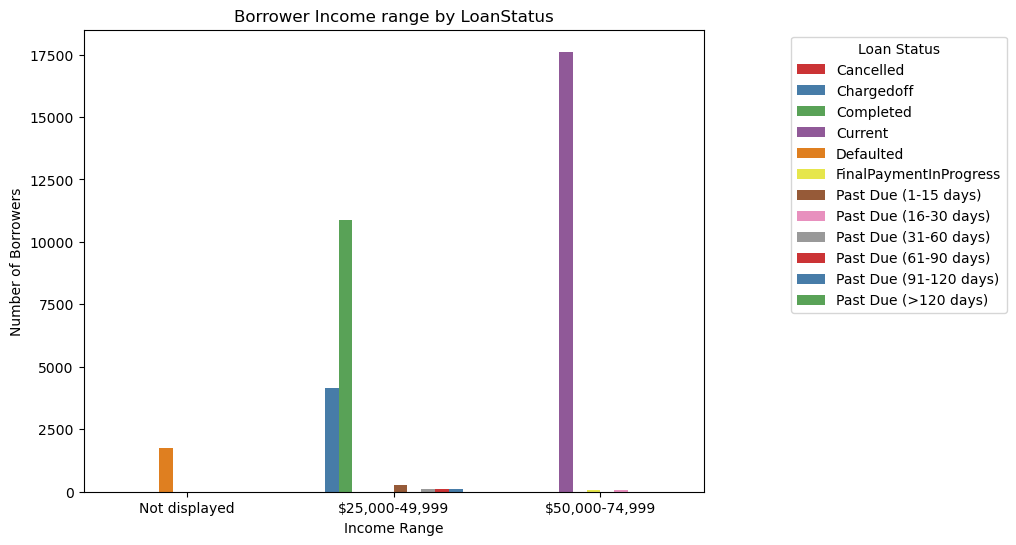

In [18]:
loan_income = df.groupby(['LoanStatus', 'IncomeRange']).size().reset_index(name='count')
loan_income = loan_income.loc[loan_income.groupby('LoanStatus')['count'].idxmax()]
plt.figure(figsize=(8, 6))
sns.barplot(x='IncomeRange', y='count', hue='LoanStatus', data=loan_income, palette='Set1')
plt.title('Borrower Income range by LoanStatus')
plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=(1.5, 1))
plt.xlabel('Income Range')
plt.ylabel('Number of Borrowers')
plt.show();

Observation: The charts show that borrowers who did not disclose their income range have a higher likelihood of defaulting on their loans. Borrowers in the income range of 25,000 to 49,999 have a high number of completed loans, but also have a significant number of charged-off loans, indicating that the loan company may need to exercise caution when lending to this income bracket. Borrowers with an income range of 50,000 to 74,999 have a high current loan status, which suggests that they are more likely to repay their loans. Based on these observations, it may be recommended that the loan company pay more attention to borrowers who did not disclose their income range and consider additional verification measures before granting loans to them. The company may also want to exercise caution when lending to borrowers in the income range of 25,000 to 49,999 and implement measures such as stricter loan requirements or lower loan amounts. Additionally, the company may want to focus on lending to borrowers in the income range of 50,000 to 74,999, as they appear to have a higher likelihood of repaying their loans.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1.Loan origination year and loan amount are positively correlated, indicating that as the years go by, more loan amounts are being originated.

2.There is a negative correlation between the estimated loss rate and the prosper rating, which indicates that as the prosper rating increases, the estimated loss rate decreases.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

One interesting observation is that the loan amount and credit score have a weak negative correlation, which means that borrowers with higher credit scores tend to take out smaller loans. Another interesting relationship is that borrowers who didn't display their income range had a higher percentage of defaulted loan status than any other income range group.

## Conclusions
The Prosper Loan dataset is well detailed with a lot of features to analyse. Although there is some inaccuracy in the dataset which require a little cleaning and manipulation, overall the main features of the dataset are explanatory. The datetime adjustment that was done was to drill down the date column to reveal just the year variable, this has helped the visualization look more detailed.

In conclusion, the Prosper Loan dataset has shown that factors like employment status, homeownership, income range, and the economic climate all have an impact on borrower loan status and that lenders should consider these factors when making lending decisions to minimize the risk of default.
